## Insurance Premium Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction
- The data consists of 7 column and 1339 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [166]:
df = pd.read_csv("/home/yogesh/ml/CoverCast AI/data/raw/insurance.csv")

#### Show Top 5 Records

In [167]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,expenses
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86


#### Shape of the dataset

In [168]:
df.shape


(1338, 8)

### 2.2 Dataset information

* The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [169]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
expenses      0
dtype: int64

#### there are no missing values in the data set

### 3.2 Check Duplicates

In [170]:
df.duplicated().sum()

np.int64(0)

In [171]:
df.drop_duplicates(inplace=True)

In [172]:
df.duplicated().sum()

np.int64(0)

#### found 1 duplicate row and it is removed


### 3.3 Check data types

In [173]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1338 non-null   int64  
 1   age         1338 non-null   int64  
 2   sex         1338 non-null   object 
 3   bmi         1338 non-null   float64
 4   children    1338 non-null   int64  
 5   smoker      1338 non-null   object 
 6   region      1338 non-null   object 
 7   expenses    1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


### 3.4 Checking the number of unique values of each column

In [174]:
df.nunique()

Unnamed: 0    1338
age             47
sex              2
bmi            275
children         6
smoker           2
region           4
expenses      1337
dtype: int64

### 3.5 Check statistics of data set

In [175]:
df.describe()

,Unnamed: 0,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.665471,1.094918,13270.422414
std,386.391641,14.049960,6.098382,1.205493,12110.011240
min,0.000000,18.000000,16.000000,0.000000,1121.870000
25%,334.250000,27.000000,26.300000,0.000000,4740.287500
50%,668.500000,39.000000,30.400000,1.000000,9382.030000
75%,1002.750000,51.000000,34.700000,2.000000,16639.915000
max,1337.000000,64.000000,53.100000,5.000000,63770.430000


### 3.6 Exploring Data

In [176]:
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,expenses
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86


In [177]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:     ",end=" " )
print(df['smoker'].unique())

print("Categories in 'region' variable:     ",end=" " )
print(df['region'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'smoker' variable:      ['yes' 'no']
Categories in 'region' variable:      ['southwest' 'southeast' 'northwest' 'northeast']


In [178]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Unnamed: 0', 'age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [179]:
df.head(2)

,Unnamed: 0,age,sex,bmi,children,smoker,region,expenses
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55


In [180]:
from scipy.stats import kurtosis, skew, stats

In [181]:
print("Summary Statistics of Medical Costs")
print(df['expenses'].describe())
print("skew:  {}".format(skew(df['expenses'])))
print("kurtosis:  {}".format(kurtosis(df['expenses'])))
print("missing charges values: {}".format(df['expenses'].isnull().sum()))
print("missing smoker values: {}".format(df['smoker'].isnull().sum()))

Summary Statistics of Medical Costs
count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64
skew:  1.5141797167430497
kurtosis:  1.5958213684180036
missing charges values: 0
missing smoker values: 0


#### Skewness

I am Getting positive Skewness , it means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode. *Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed. *If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.

*So here My data is Highly Skewed. My Skew value is 1.51

#### Kurtosis

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.

Mesokurtic : It means that the extreme values of the distribution are similar to that of a normal distribution characteristic.

Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter which means that data are heavy-tailed or profusion of outliers.

Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution which means that data are light-tailed or lack of outliers.

#### In this Dataset Kurtosis is Platykurtic: (Kurtosis < 3) bcoz no Out Liers

<Axes: xlabel='expenses'>

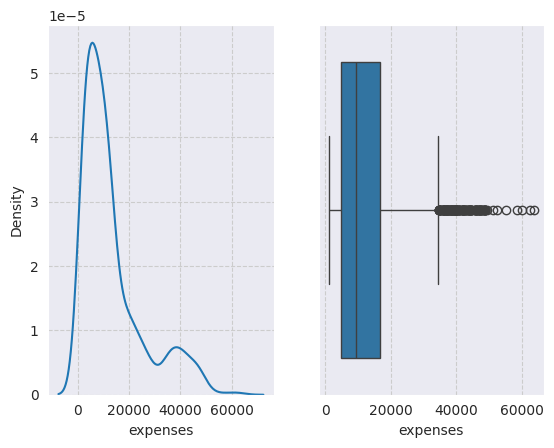

In [182]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(df['expenses'], ax=axes[0])
sns.boxplot(df['expenses'], ax=axes[1], orient='h')

Both the boxplot and kernel density estimation plot reveal that the expences data is right skewed. Furthermore, there are some outliers but no missing charges and smoker values

<Axes: >

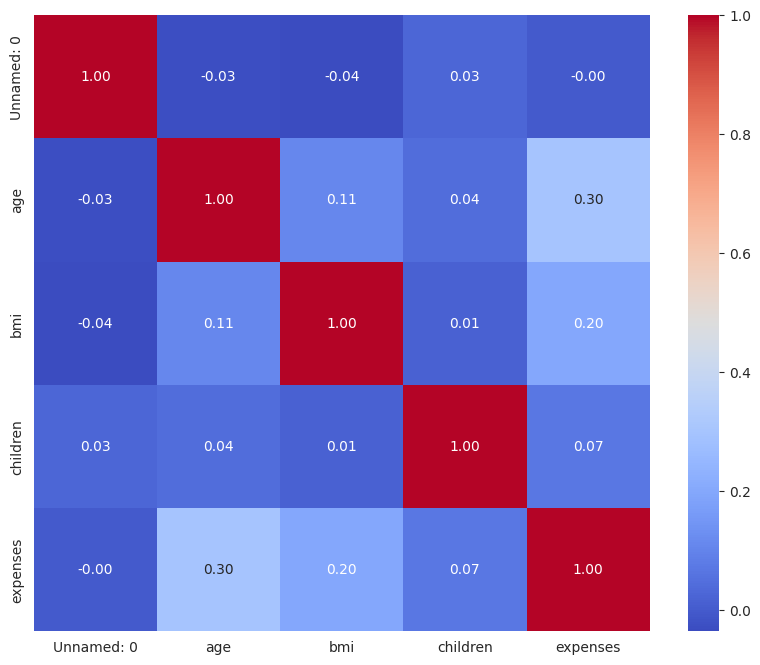

In [183]:
df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)


In [184]:
df

,Unnamed: 0,age,sex,bmi,children,smoker,region,expenses
0,0,19,female,27.9,0,yes,southwest,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...,...
1333,1333,50,male,31.0,3,no,northwest,10600.55
1334,1334,18,female,31.9,0,no,northeast,2205.98
1335,1335,18,female,36.9,0,no,southeast,1629.83
1336,1336,21,female,25.8,0,no,southwest,2007.95


In [185]:
import numpy as np
df["log_expenses"] = np.log1p(df["expenses"])


In [186]:
# Only compute covariance for numeric columns
df.cov(numeric_only=True)

,Unnamed: 0,age,bmi,children,expenses,log_expenses
Unnamed: 0,149298.500000,-170.829095,-85.169559,11.747569,-1.578132e+04,1.969237
age,-170.829095,197.401387,9.368560,0.719303,5.087480e+04,6.817814
bmi,-85.169559,9.368560,37.190265,0.092958,1.466515e+04,0.744552
children,11.747569,0.719303,0.092958,1.453213,9.926742e+02,0.178788
expenses,-15781.321679,50874.802133,14665.149703,992.674243,1.466524e+08,9942.340986
log_expenses,1.969237,6.817814,0.744552,0.178788,9.942341e+03,0.845258


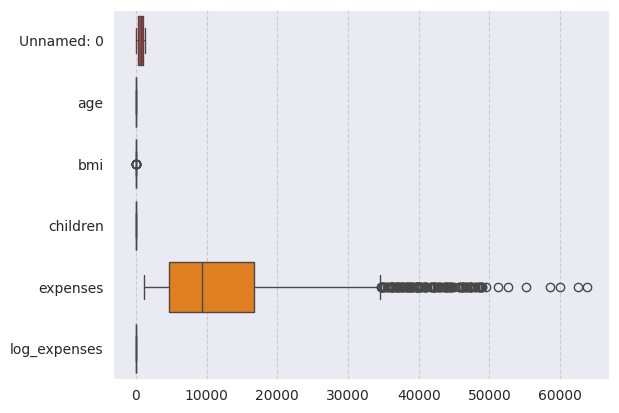

In [187]:
ax = sns.boxplot(data = df, orient = "h", color = "violet", palette = "Set1")
plt.show()

In [188]:
from scipy.stats.mstats import winsorize
df["expenses_capped"] = winsorize(df["expenses"], limits=[0.01, 0.01])


In [189]:
df

,Unnamed: 0,age,sex,bmi,children,smoker,region,expenses,log_expenses,expenses_capped
0,0,19,female,27.9,0,yes,southwest,16884.92,9.734235,16884.92
1,1,18,male,33.8,1,no,southeast,1725.55,7.453880,1725.55
2,2,28,male,33.0,3,no,southeast,4449.46,8.400763,4449.46
3,3,33,male,22.7,0,no,northwest,21984.47,9.998137,21984.47
4,4,32,male,28.9,0,no,northwest,3866.86,8.260457,3866.86
...,...,...,...,...,...,...,...,...,...,...
1333,1333,50,male,31.0,3,no,northwest,10600.55,9.268755,10600.55
1334,1334,18,female,31.9,0,no,northeast,2205.98,7.699380,2205.98
1335,1335,18,female,36.9,0,no,southeast,1629.83,7.396844,1629.83
1336,1336,21,female,25.8,0,no,southwest,2007.95,7.605367,2007.95


In [190]:
df.nunique()

Unnamed: 0         1338
age                  47
sex                   2
bmi                 275
children              6
smoker                2
region                4
expenses           1337
log_expenses       1337
expenses_capped    1311
dtype: int64

In [191]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

change the column "sex" to gender

In [192]:
df.rename(columns={'sex':'gender'}, inplace=True, level=None)

In [193]:
df.gender.value_counts()

gender
male      676
female    662
Name: count, dtype: int64

#### Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is the distribution of Gender

#### UNIVARIATE ANALYSIS (How is distribution of Gender? )

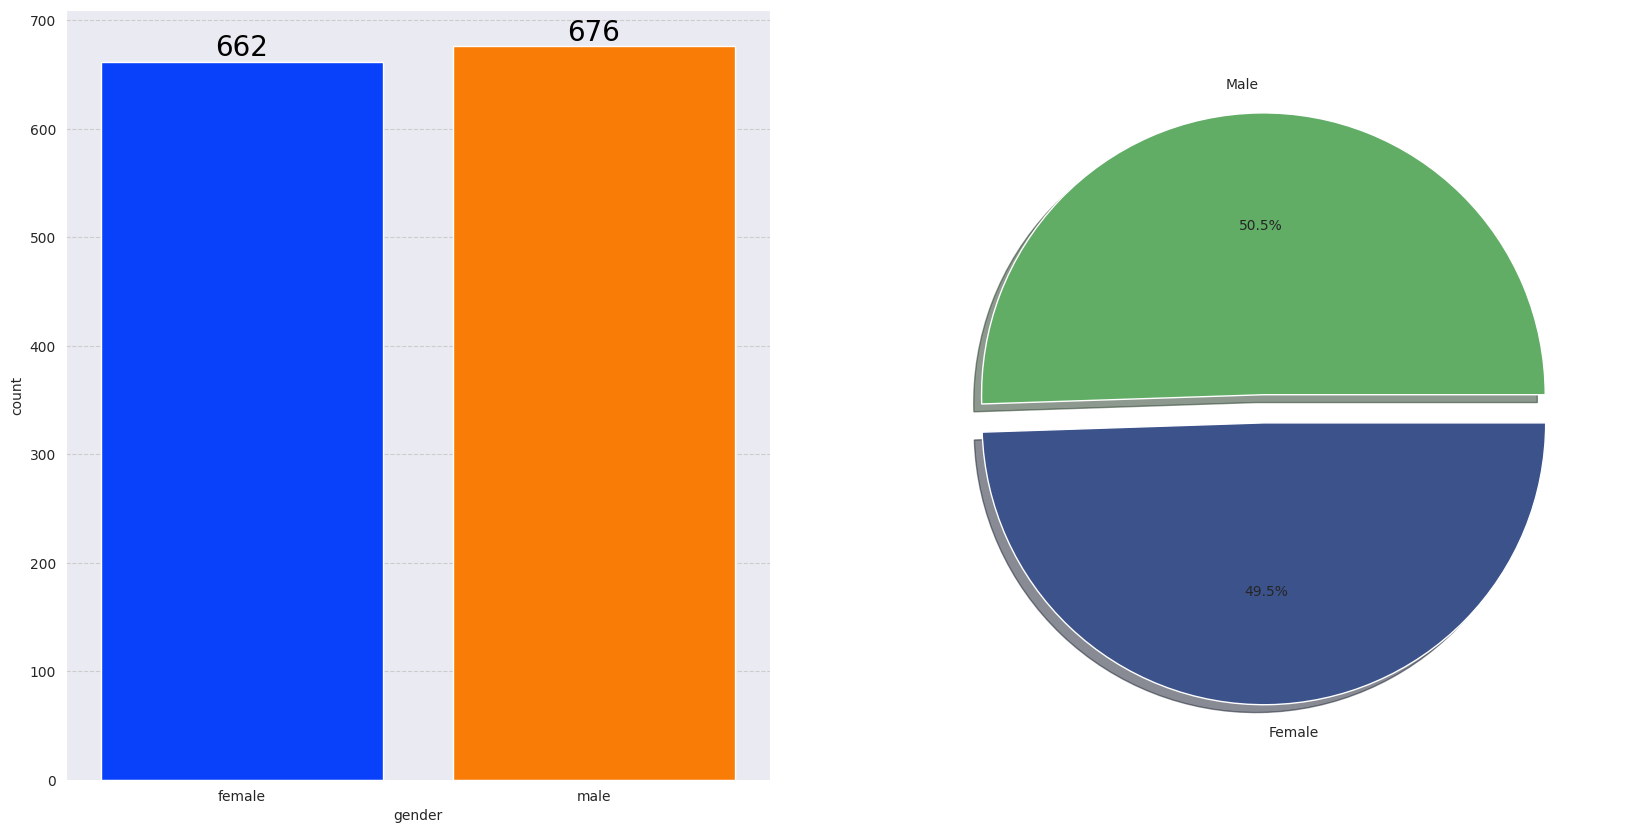

In [194]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors = ['#61ad66','#3b528b'])
plt.show()

#### Insights
- Gender has balanced data with females are 662 (49.5%) and males are 675 (50.5%)

<Axes: xlabel='age', ylabel='Count'>

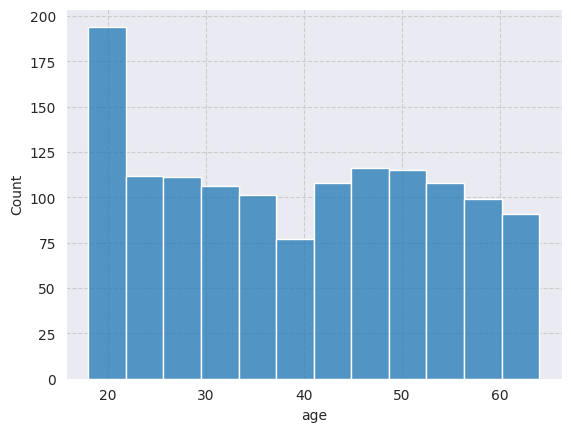

In [195]:
sns.histplot(df.age)

<Axes: xlabel='expenses', ylabel='Density'>

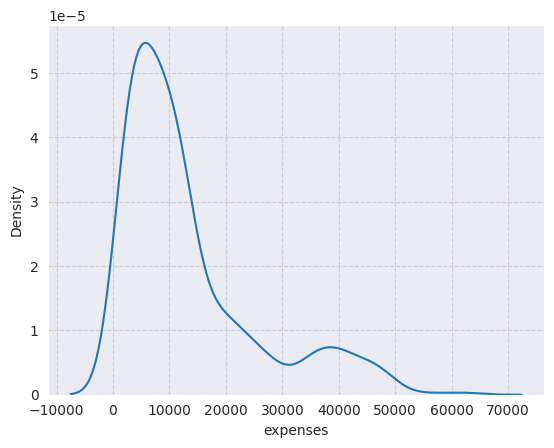

In [196]:
sns.kdeplot(data=df,x=df.expenses)

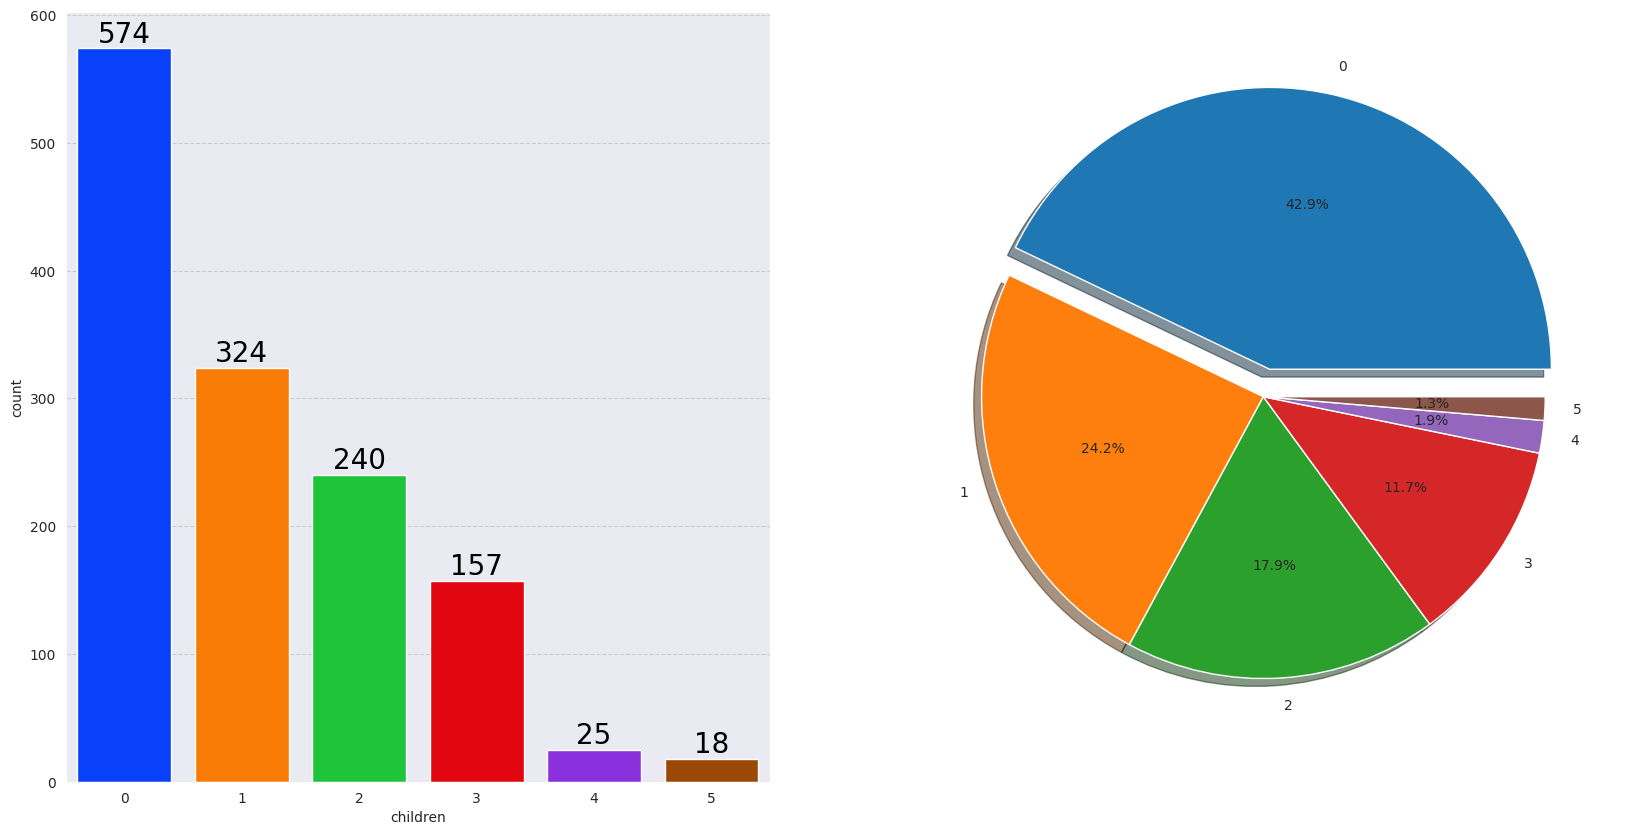

In [197]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['children'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)


plt.pie(x=df.children.value_counts(), labels=df.children.value_counts().index, explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
- Higher number of people are with 0 children

#### BIVARIATE ANALYSIS

In [198]:
df.groupby('gender')[numeric_features].mean()

,Unnamed: 0,age,bmi,children,expenses
gender,,,,,
female,667.054381,39.503021,30.379758,1.074018,12569.578897
male,669.915680,38.917160,30.945266,1.115385,13956.751420


<Axes: xlabel='bmi', ylabel='Density'>

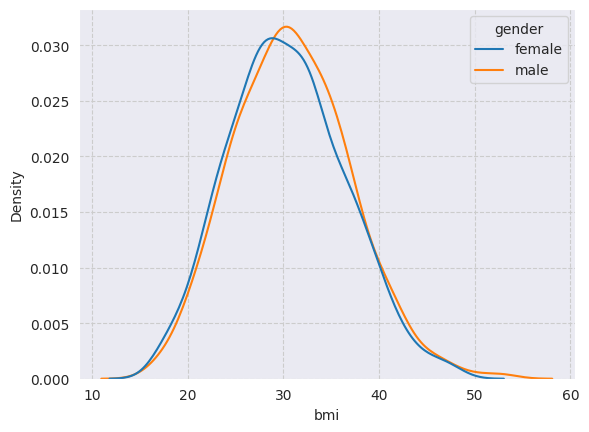

In [199]:
sns.kdeplot(data=df, x='bmi', hue='gender' )

<Axes: xlabel='smoker', ylabel='count'>

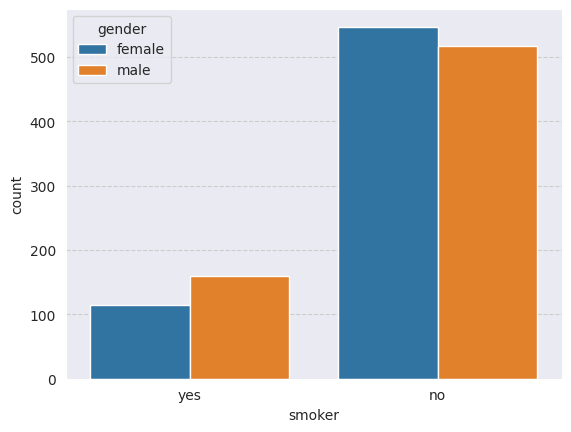

In [200]:

sns.countplot(data=df, x='smoker', hue='gender')

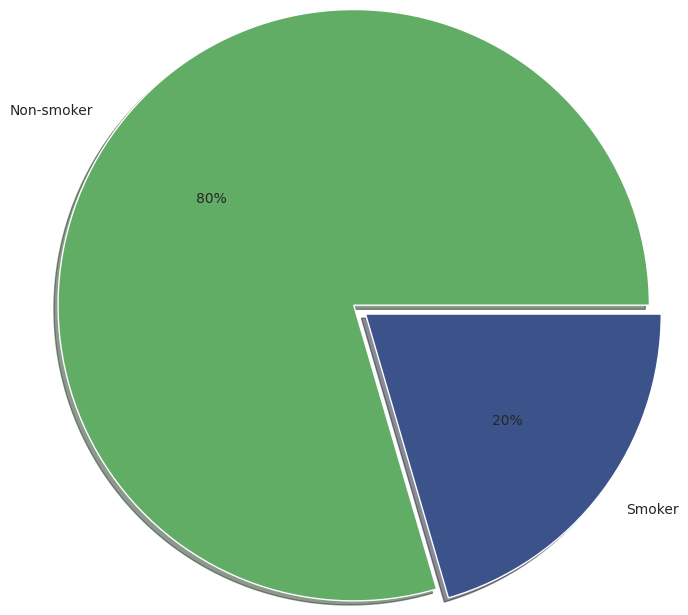

In [201]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
out_df=pd.DataFrame(df.groupby('smoker')['smoker'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['smoker'],labels=['Non-smoker','Smoker'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

#### Insights
- Males have higher number of smokers compared to females

#### BIVARIATE ANALYSIS

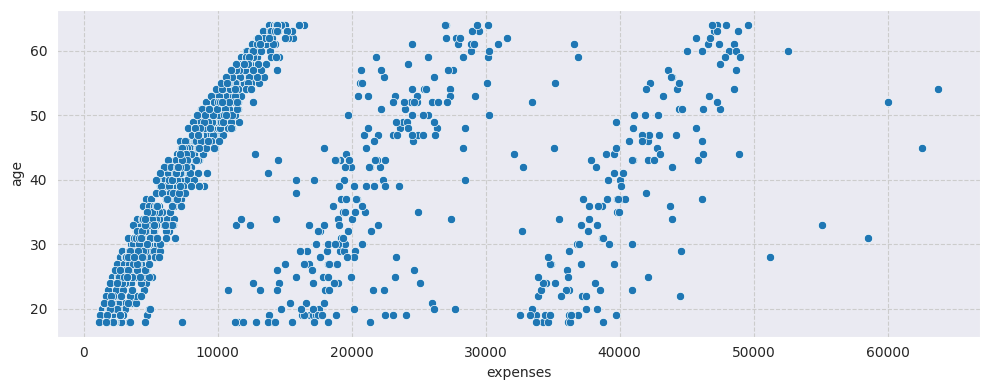

In [202]:
plt.figure(figsize=(10,4))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.scatterplot(y=df['age'],x=df['expenses'],palette='RdYlGn_r')
plt.tight_layout()
plt.grid(True)
plt.show()

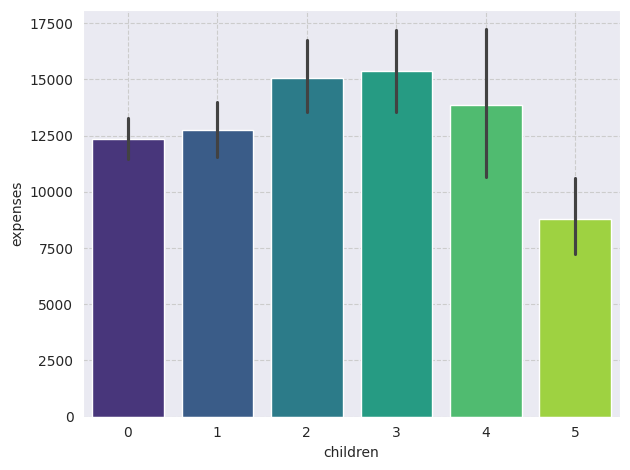

In [203]:
sns.barplot(x='children',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

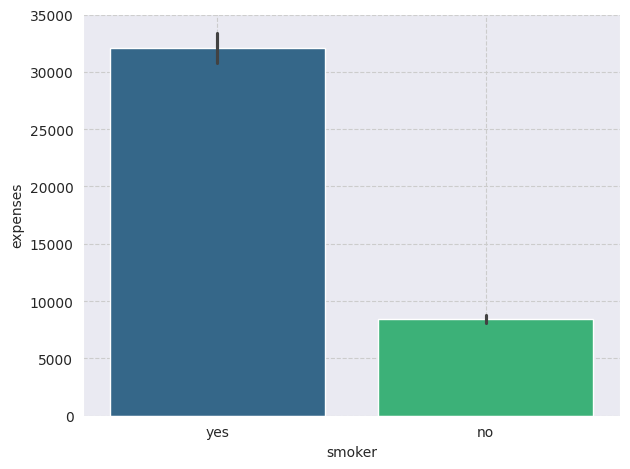

In [204]:
sns.barplot(x='smoker',y='expenses',data=df,palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

#### See the relation between BMI and Expences

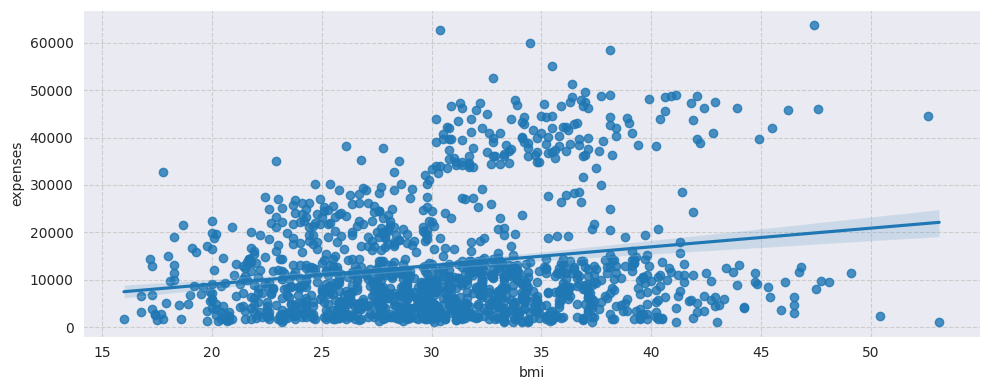

In [205]:
plt.figure(figsize=(10,4))
sns.regplot(x=df['bmi'],y=df['expenses'])
plt.tight_layout()
plt.grid(True)
plt.show()

In [206]:
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'expenses', 'log_expenses', 'expenses_capped'],
      dtype='object')

1️⃣ Data Cleaning & Basic Feature Creation

In [207]:
# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0"])

# Ensure correct dtypes
cat_cols = ["gender", "smoker", "region"]
df[cat_cols] = df[cat_cols].astype("category")

# Encode categorical features (One-hot encoding)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [208]:
df

,age,bmi,children,expenses,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,9.734235,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,7.453880,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,8.400763,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,9.998137,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,8.260457,3866.86,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,9.268755,10600.55,True,False,True,False,False
1334,18,31.9,0,2205.98,7.699380,2205.98,False,False,False,False,False
1335,18,36.9,0,1629.83,7.396844,1629.83,False,False,False,True,False
1336,21,25.8,0,2007.95,7.605367,2007.95,False,False,False,False,True


In [209]:
from scipy.stats.mstats import winsorize

# Cap extreme outliers in expenses
df["expenses_capped"] = winsorize(df["expenses"], limits=[0.01, 0.01])

# Log transform for skewness
df["log_expenses"] = np.log1p(df["expenses"])


In [210]:
df

,age,bmi,children,expenses,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,9.734235,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,7.453880,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,8.400763,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,9.998137,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,8.260457,3866.86,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,9.268755,10600.55,True,False,True,False,False
1334,18,31.9,0,2205.98,7.699380,2205.98,False,False,False,False,False
1335,18,36.9,0,1629.83,7.396844,1629.83,False,False,False,True,False
1336,21,25.8,0,2007.95,7.605367,2007.95,False,False,False,False,True


In [211]:
from sklearn.preprocessing import PolynomialFeatures

# Example interaction: bmi × age, smoker × bmi
df["bmi_age"] = df["bmi"] * df["age"]
df["smoker_bmi"] = df["smoker_yes"] * df["bmi"]  # adjust column name as per dummies

# Polynomial features for non-linear patterns
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[["age", "bmi", "children"]])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(["age", "bmi", "children"]))
df = pd.concat([df, poly_df], axis=1)


In [212]:
df

,age,bmi,children,expenses,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,region_southeast,...,smoker_bmi,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2
0,19,27.9,0,16884.92,9.734235,16884.92,False,True,False,False,...,27.9,19.0,27.9,0.0,361.0,530.1,0.0,778.41,0.0,0.0
1,18,33.8,1,1725.55,7.453880,1725.55,True,False,False,True,...,0.0,18.0,33.8,1.0,324.0,608.4,18.0,1142.44,33.8,1.0
2,28,33.0,3,4449.46,8.400763,4449.46,True,False,False,True,...,0.0,28.0,33.0,3.0,784.0,924.0,84.0,1089.00,99.0,9.0
3,33,22.7,0,21984.47,9.998137,21984.47,True,False,True,False,...,0.0,33.0,22.7,0.0,1089.0,749.1,0.0,515.29,0.0,0.0
4,32,28.9,0,3866.86,8.260457,3866.86,True,False,True,False,...,0.0,32.0,28.9,0.0,1024.0,924.8,0.0,835.21,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,9.268755,10600.55,True,False,True,False,...,0.0,50.0,31.0,3.0,2500.0,1550.0,150.0,961.00,93.0,9.0
1334,18,31.9,0,2205.98,7.699380,2205.98,False,False,False,False,...,0.0,18.0,31.9,0.0,324.0,574.2,0.0,1017.61,0.0,0.0
1335,18,36.9,0,1629.83,7.396844,1629.83,False,False,False,True,...,0.0,18.0,36.9,0.0,324.0,664.2,0.0,1361.61,0.0,0.0
1336,21,25.8,0,2007.95,7.605367,2007.95,False,False,False,False,...,0.0,21.0,25.8,0.0,441.0,541.8,0.0,665.64,0.0,0.0


In [213]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = [col for col in df.columns if col not in ["expenses", "log_expenses", "expenses_capped"]]
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [214]:
df.columns

Index(['age', 'bmi', 'children', 'expenses', 'log_expenses', 'expenses_capped',
       'gender_male', 'smoker_yes', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_age', 'smoker_bmi', 'age', 'bmi', 'children',
       'age^2', 'age bmi', 'age children', 'bmi^2', 'bmi children',
       'children^2'],
      dtype='object')

In [215]:
# Remove target and capped versions from features
drop_cols = ["expenses", "log_expenses", "expenses_capped"]
X = df.drop(columns=drop_cols)

# Remove duplicate columns by name
X = X.loc[:, ~X.columns.duplicated()]


In [216]:
df

,age,bmi,children,expenses,log_expenses,expenses_capped,gender_male,smoker_yes,region_northwest,region_southeast,...,smoker_bmi,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2
0,0.021739,0.320755,0.0,16884.92,9.734235,16884.92,0.0,1.0,0.0,0.0,...,0.530418,0.021739,0.320755,0.0,0.009809,0.094578,0.000000,0.203779,0.000000,0.00
1,0.000000,0.479784,0.2,1725.55,7.453880,1725.55,1.0,0.0,0.0,1.0,...,0.000000,0.000000,0.479784,0.2,0.000000,0.125166,0.069231,0.345778,0.144444,0.04
2,0.217391,0.458221,0.6,4449.46,8.400763,4449.46,1.0,0.0,0.0,1.0,...,0.000000,0.217391,0.458221,0.6,0.121951,0.248457,0.323077,0.324932,0.423077,0.36
3,0.326087,0.180593,0.0,21984.47,9.998137,21984.47,1.0,0.0,1.0,0.0,...,0.000000,0.326087,0.180593,0.0,0.202810,0.180131,0.000000,0.101143,0.000000,0.00
4,0.304348,0.347709,0.0,3866.86,8.260457,3866.86,1.0,0.0,1.0,0.0,...,0.000000,0.304348,0.347709,0.0,0.185578,0.248769,0.000000,0.225935,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.404313,0.6,10600.55,9.268755,10600.55,1.0,0.0,1.0,0.0,...,0.000000,0.695652,0.404313,0.6,0.576882,0.493007,0.576923,0.275003,0.397436,0.36
1334,0.000000,0.428571,0.0,2205.98,7.699380,2205.98,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.428571,0.0,0.000000,0.111806,0.000000,0.297085,0.000000,0.00
1335,0.000000,0.563342,0.0,1629.83,7.396844,1629.83,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.563342,0.0,0.000000,0.146965,0.000000,0.431271,0.000000,0.00
1336,0.065217,0.264151,0.0,2007.95,7.605367,2007.95,0.0,0.0,0.0,0.0,...,0.000000,0.065217,0.264151,0.0,0.031018,0.099148,0.000000,0.159790,0.000000,0.00


In [218]:
df.to_csv('/home/yogesh/ml/CoverCast AI/data/raw/insurance2.csv')